<a href="https://colab.research.google.com/github/sprksh-crypto/MachineLearningProjects/blob/main/dummy2ProjFor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'm doing this dummy project to verify the code works as intended by using a smaller, easily examinable, scale. The larger layer set will be: 784-1000-10. I will use 4-5-2.

In the case for the 3 layer project: 4 is source, 5 is a second source, 2 will be the target.

I know in my larger code column goes to source, and row goes to target.

In [ ]:
import numpy as np

# Create a 4x5 NumPy array with random values
random_array = np.random.rand(5, 4)

random_array1= np.random.rand(2,5)

print(random_array)
print(random_array1)

[[0.54744284 0.70187746 0.31754313 0.38738305]
 [0.79580141 0.37758053 0.82941872 0.44608782]
 [0.89787483 0.19587169 0.11143688 0.88381856]
 [0.66755505 0.80023074 0.5020136  0.49011073]
 [0.78273416 0.11647653 0.50967221 0.67378599]]
[[0.80940031 0.40807505 0.36228175 0.38191959 0.80698213]
 [0.91386629 0.14442483 0.58580972 0.69776745 0.15562013]]


In [ ]:
import networkx as nx

col_labels = list(range(random_array.shape[1]))
row_labels = list(range(random_array.shape[0]))

print(col_labels)
print(row_labels)

# Create separate lists for source and target nodes
source_node_labels = [f"{0}:{j}" for j in range(random_array.shape[1])]
middle_node_labels = [f"{1}:{j}" for j in range(random_array.shape[0])]
target_node_labels = [f"{2}:{j}" for j in range(random_array1.shape[0])]

print(source_node_labels)
print(middle_node_labels)
print(target_node_labels)

G = nx.Graph()

G.add_nodes_from(source_node_labels, bipartite=0)
G.add_nodes_from(middle_node_labels, bipartite=1)
G.add_nodes_from(target_node_labels, bipartite=2)

print(G)

[0, 1, 2, 3]
[0, 1, 2, 3, 4]
['0:0', '0:1', '0:2', '0:3']
['1:0', '1:1', '1:2', '1:3', '1:4']
['2:0', '2:1']
Graph with 11 nodes and 0 edges


In [ ]:
# Add weighted edges
for i in range(random_array.shape[0]):
    # Loop through the columns of the random_array
    for j in range(random_array.shape[1]):
        # Get the corresponding node labels
        source_node = source_node_labels[j]
        middle_node = middle_node_labels[i]
        weight = random_array[i][j]

        # Add an edge between the nodes with the weight from the random_array
        G.add_edge(source_node, middle_node, weight=weight)

for i in range(random_array1.shape[0]):
    # Loop through the columns of the random_array
    for j in range(random_array1.shape[1]):
        # Get the corresponding node labels
        middle_node = middle_node_labels[j]
        target_node = target_node_labels[i]
        weight = random_array1[i][j]

        # Add an edge between the nodes with the weight from the random_array
        G.add_edge(middle_node, target_node, weight=weight)

In [ ]:
print(G)

Graph with 11 nodes and 30 edges


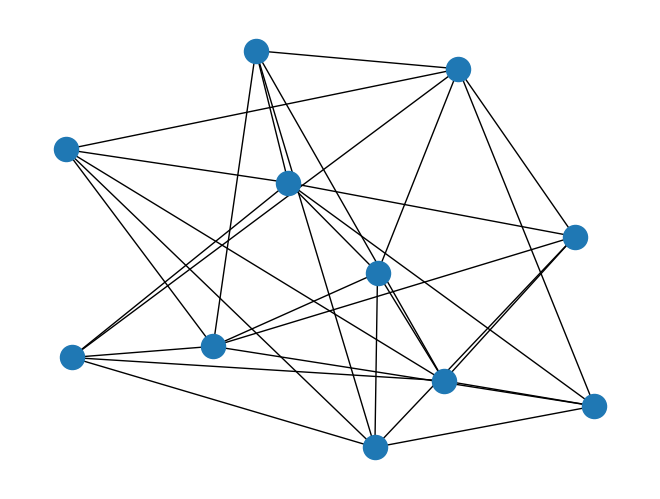

In [ ]:
nx.draw(G)

In [ ]:
is_bipartite=nx.is_bipartite(G)
print(is_bipartite)

is_connected = nx.is_connected(G)
print(is_connected)

True
True


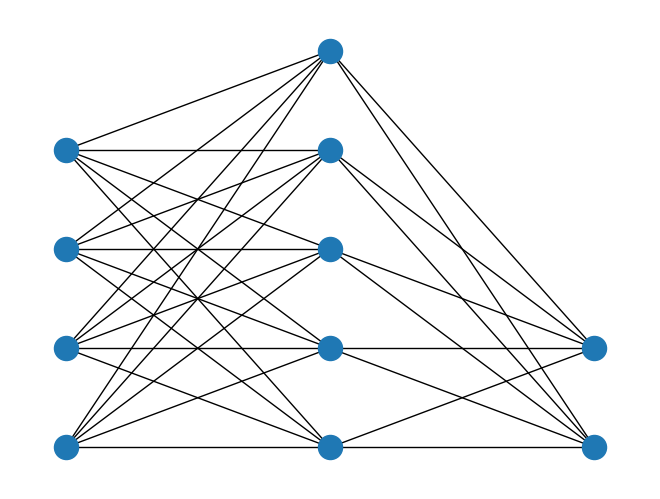

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

pos = dict()
pos.update( (n, (0, i)) for i, n in enumerate(source_node_labels) ) # put nodes from X at x=1
pos.update( (n, (1, i)) for i, n in enumerate(middle_node_labels) ) # put nodes from Y at x=2
pos.update( (n, (2, i)) for i, n in enumerate(target_node_labels) ) # put nodes from Y at x=3
nx.draw(G, pos=pos)
plt.show()

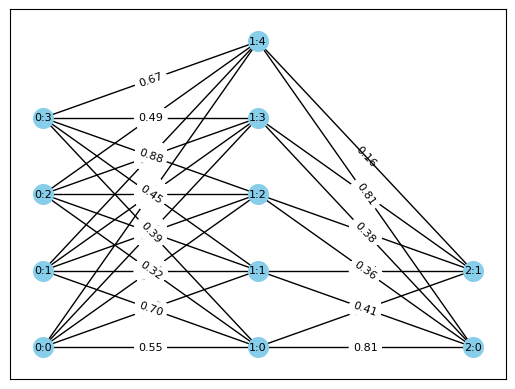

In [ ]:
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
for u, v, data in G.edges(data=True):
    weight = data['weight']
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)])

plt.show()

In [ ]:
# Get all edge attributes
edge_attributes = nx.get_edge_attributes(G, 'weight')

# Print the edge attributes
print(edge_attributes)

{('0:0', '1:0'): 0.5474428351896514, ('0:0', '1:1'): 0.7958014078800781, ('0:0', '1:2'): 0.8978748306352685, ('0:0', '1:3'): 0.6675550503480392, ('0:0', '1:4'): 0.7827341559399107, ('0:1', '1:0'): 0.7018774585865458, ('0:1', '1:1'): 0.3775805314064511, ('0:1', '1:2'): 0.19587169199467158, ('0:1', '1:3'): 0.8002307406090124, ('0:1', '1:4'): 0.11647653405555913, ('0:2', '1:0'): 0.3175431296674176, ('0:2', '1:1'): 0.8294187151918235, ('0:2', '1:2'): 0.11143687834704263, ('0:2', '1:3'): 0.5020135980355012, ('0:2', '1:4'): 0.5096722129968102, ('0:3', '1:0'): 0.3873830451208389, ('0:3', '1:1'): 0.4460878151365001, ('0:3', '1:2'): 0.8838185577324844, ('0:3', '1:3'): 0.49011073064709965, ('0:3', '1:4'): 0.6737859942569878, ('1:0', '2:0'): 0.8094003142784456, ('1:0', '2:1'): 0.9138662894056565, ('1:1', '2:0'): 0.40807504787858273, ('1:1', '2:1'): 0.1444248300098333, ('1:2', '2:0'): 0.3622817461535165, ('1:2', '2:1'): 0.5858097167637477, ('1:3', '2:0'): 0.3819195873611282, ('1:3', '2:1'): 0.6977

In [ ]:
#Now, all my tasks have been completed for two layers, now I need to do this between two matrices and three layers.